In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading:

In [6]:
df = pd.read_csv('Eid Sales Data.csv', encoding='unicode_escape')

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.isnull().sum() #show null value count

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

## Data cleaning:

In [9]:
df.drop(['Status','unnamed1'], axis=1, inplace=True) #remove extra last 2 columns 

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [14]:
df.dropna(inplace=True) #remove null values 

In [15]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

## Descriptive Statistics: 

In [16]:
df.describe() #Display statistical information of date

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [19]:
df['Amount'] = df['Amount'].astype('int')

In [21]:
df['Amount'].dtype

dtype('int32')

## EDA (Expodatary Data Analysis):

## Gender:

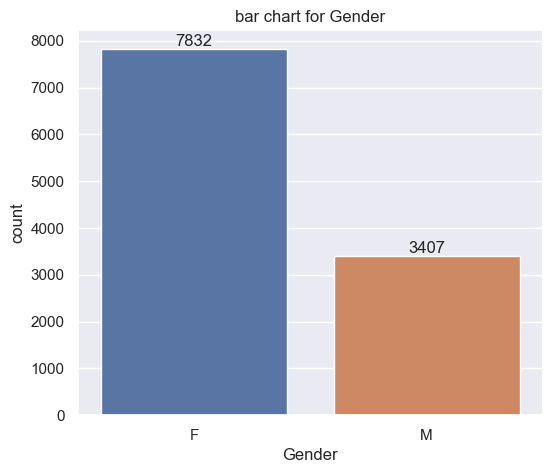

In [150]:
# plotting a bar chart for Gender and it's count
plt.subplots(figsize=(6,5))
ax = sns.countplot(x='Gender', data=df)
plt.title('bar chart for Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show();

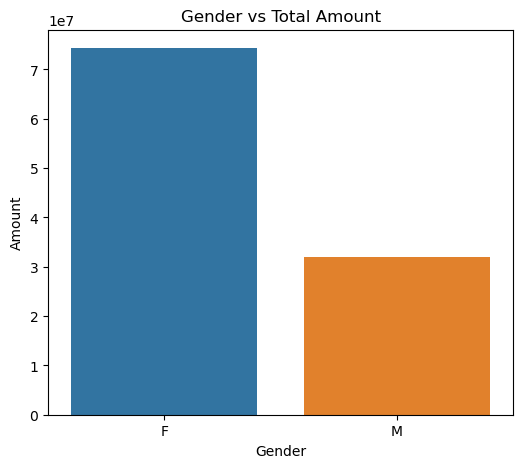

In [101]:
# plotting a bar chart for gender vs total amount
plt.subplots(figsize=(6,5))
gender_wise_sale = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x='Gender', y='Amount' ,data=gender_wise_sale)
plt.title('Gender vs Total Amount')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show();


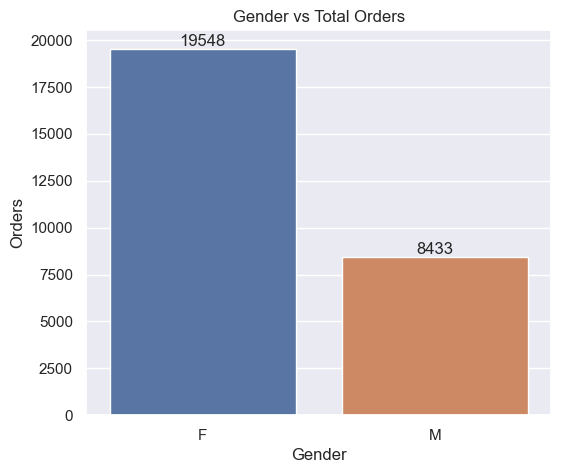

In [153]:
# plotting a bar chart for gender vs total Orders
plt.subplots(figsize=(6,5))
gender_wise_sale = df.groupby(['Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
ax = sns.barplot(x='Gender', y='Orders' ,data=gender_wise_sale)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender vs Total Orders')
plt.xlabel('Gender')
plt.ylabel('Orders')
plt.show();


From above graph we can see that most of buyers are females and even purchasing power of females is greater then man.

## Age:

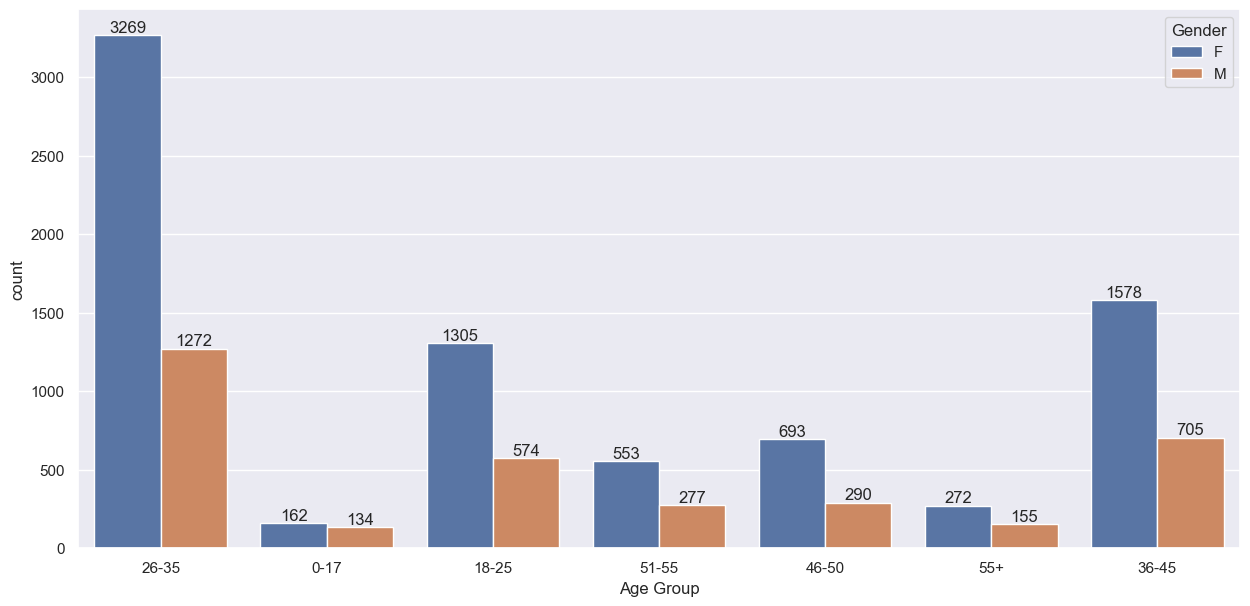

In [154]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.countplot(data = df, x = 'Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show();

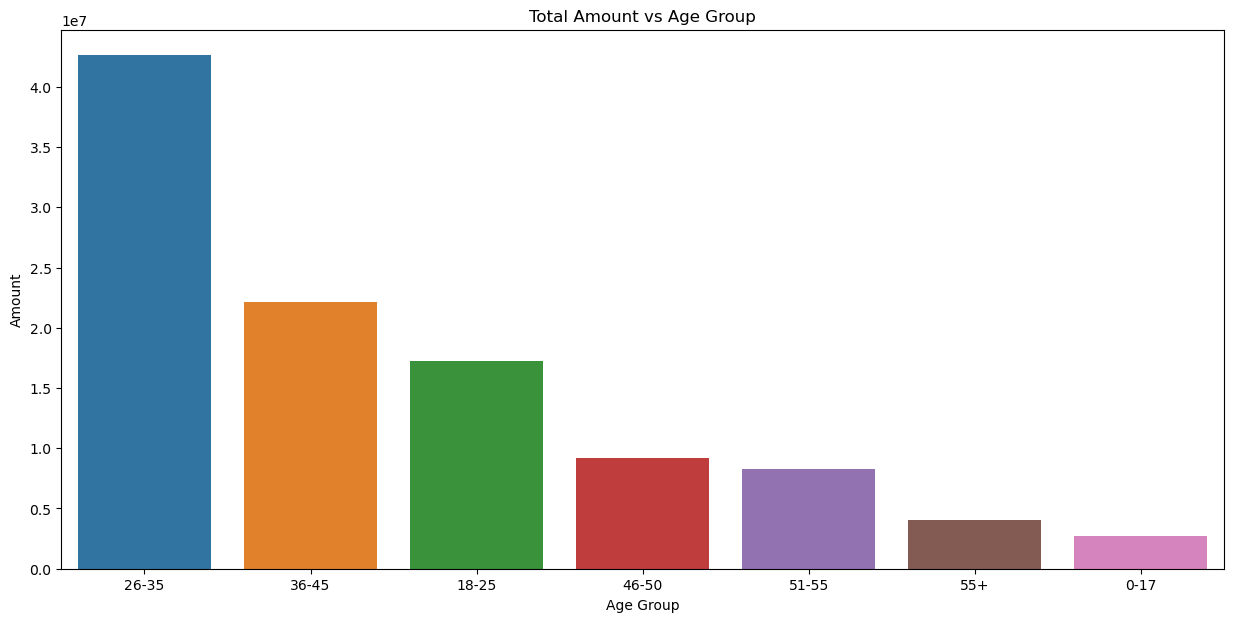

In [76]:
# Total Amount vs Age Group
fig, ax = plt.subplots(figsize=(15,7))
sales_age= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax=sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.title('Total Amount vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.show();

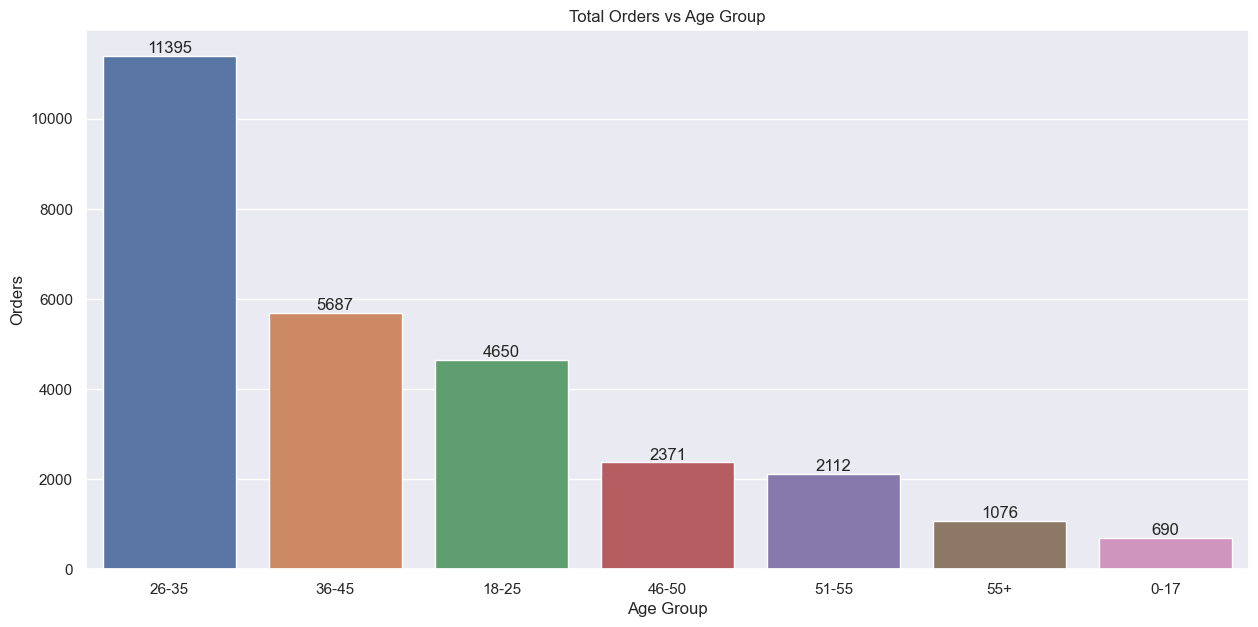

In [155]:
# Total Orders vs Age Group
fig, ax = plt.subplots(figsize=(15,7))
sales_age= df.groupby(['Age Group'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
ax=sns.barplot(x='Age Group', y='Orders', data=sales_age)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Orders vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Orders')
plt.show();

From above graph we can see that most of the buyers are of age group 26-35.

## Marital_Status

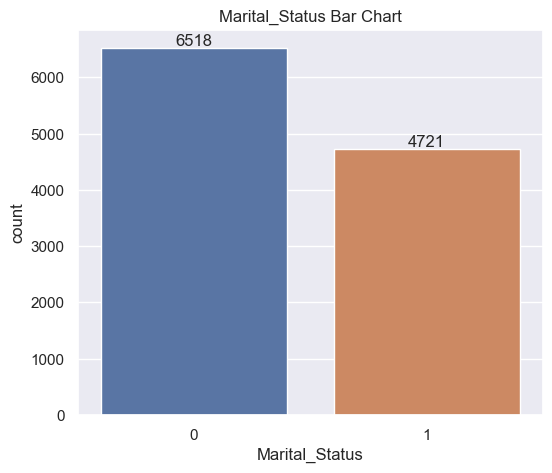

In [156]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(data=df, x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Marital_Status Bar Chart')
plt.show();


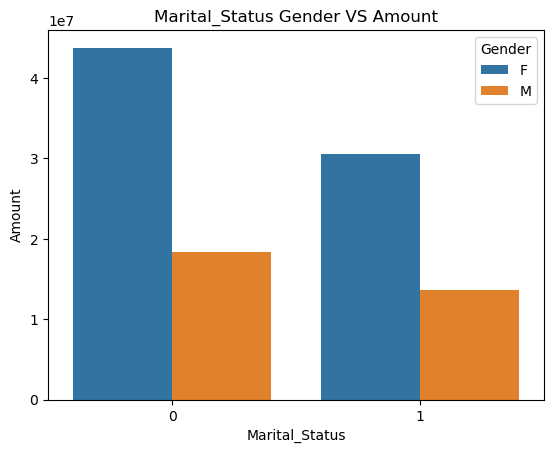

In [135]:
sales_marital_gender = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(data=sales_marital_gender, x='Marital_Status', y ='Amount', hue='Gender')
plt.title('Marital_Status Gender VS Amount')
plt.show();

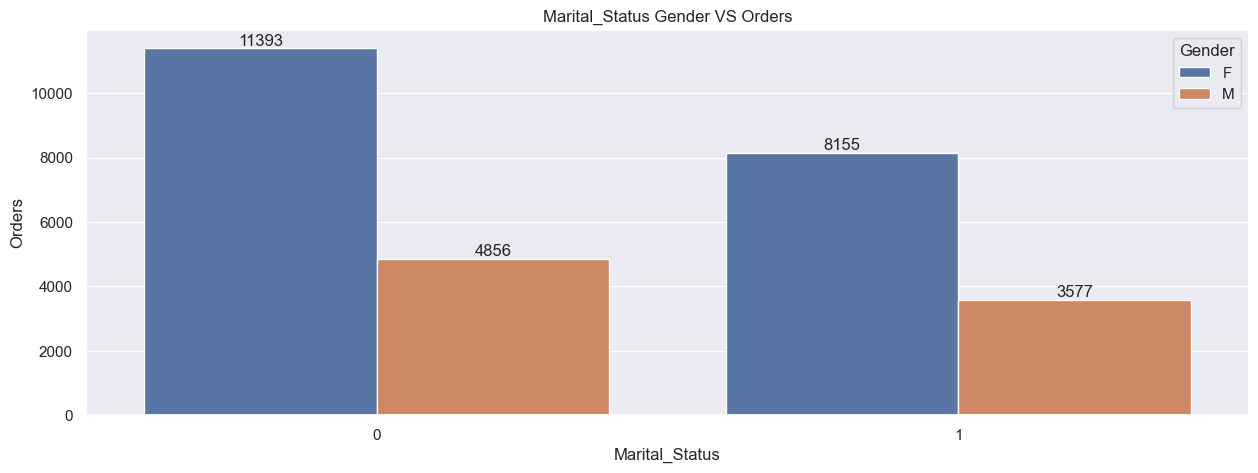

In [257]:
fig, ax = plt.subplots(figsize=(15,5))
sales_marital_gender = df.groupby(['Marital_Status','Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
ax = sns.barplot(data=sales_marital_gender, x='Marital_Status', y ='Orders', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Marital_Status Gender VS Orders')
plt.show();

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## State

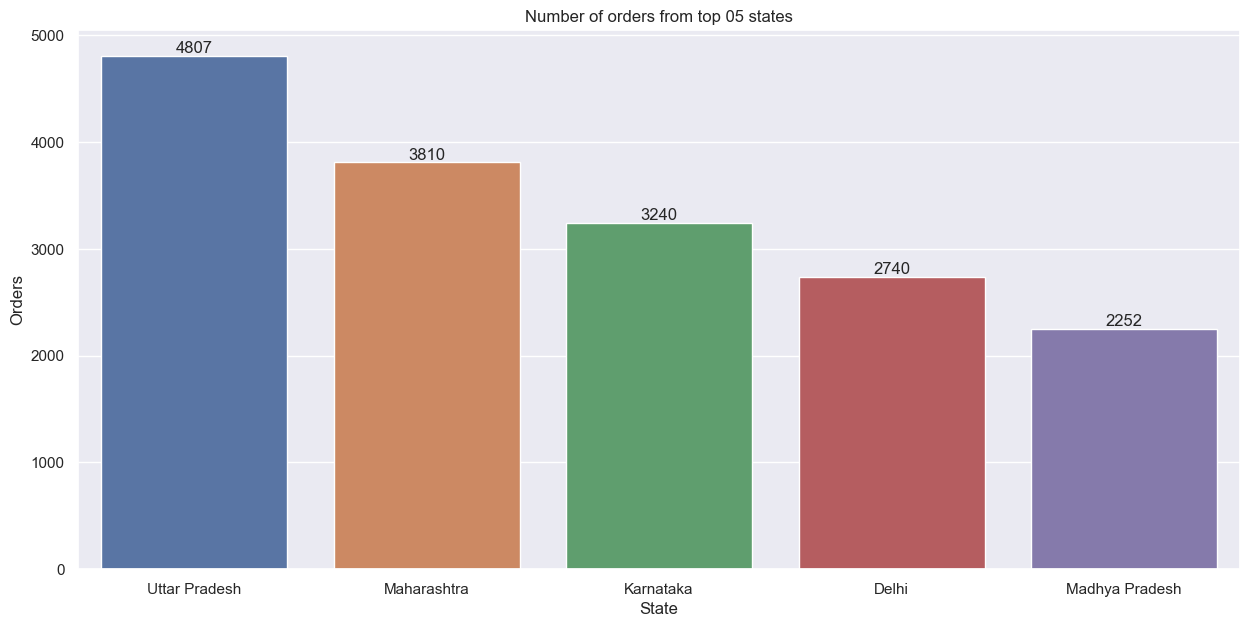

In [157]:
# total number of orders from top 05 states
fig, ax = plt.subplots(figsize=(15,7))
order_by_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
ax = sns.barplot(data=order_by_state, x='State', y='Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of orders from top 05 states')
plt.show();

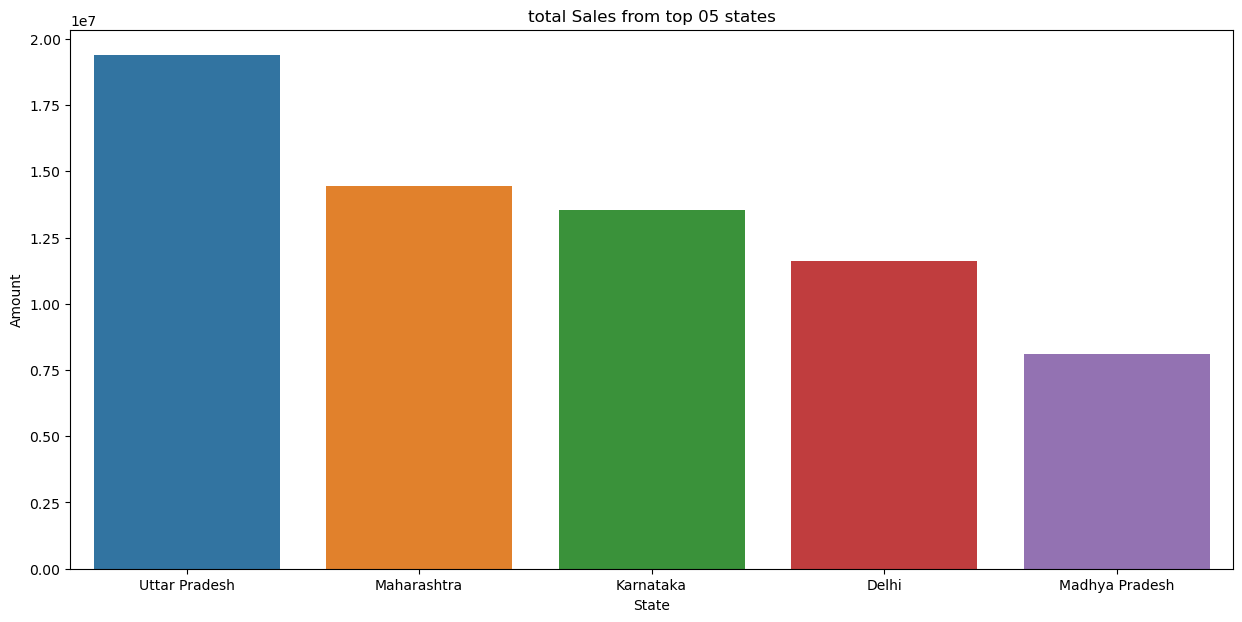

In [142]:
# total Sales from top 05 states
fig, ax = plt.subplots(figsize=(15,7))
sale_by_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
ax = sns.barplot(data=sale_by_state, x='State', y='Amount')
#ax.bar_label(ax.containers[0])
plt.title('total Sales from top 05 states')
plt.show();

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

## Zones

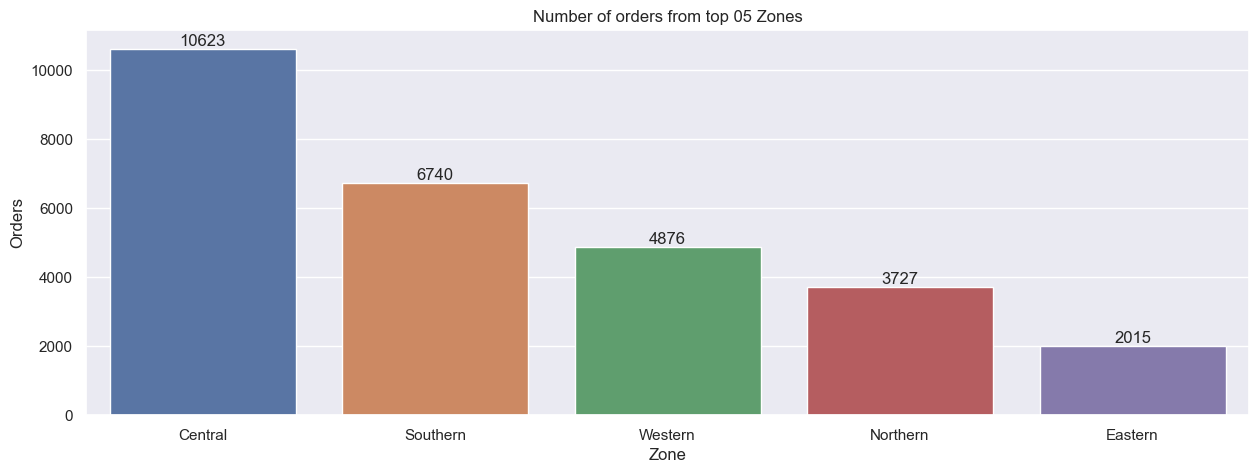

In [256]:
# total number of orders from top 05 Zones
fig, ax = plt.subplots(figsize=(15,5))
order_by_state = df.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
ax = sns.barplot(data=order_by_state, x='Zone', y='Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of orders from top 05 Zones')
plt.show();

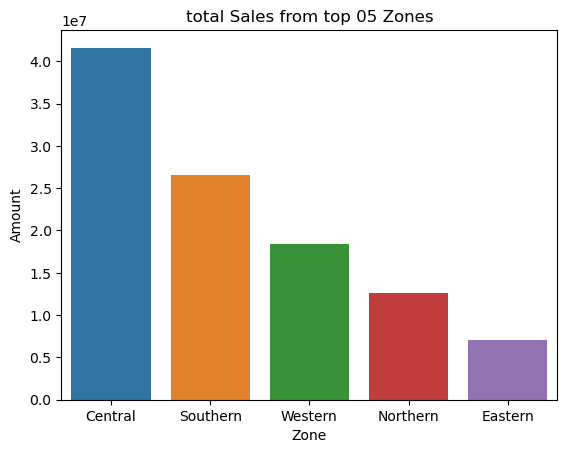

In [130]:
# total Sales from top 05 Zones
sale_by_state = df.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
ax = sns.barplot(data=sale_by_state, x='Zone', y='Amount')
plt.title('total Sales from top 05 Zones')
plt.show();

From above graphs we can see that most of the orders & total sales/amount are from Central, Southern and Western Zone respectively.

## Occupation

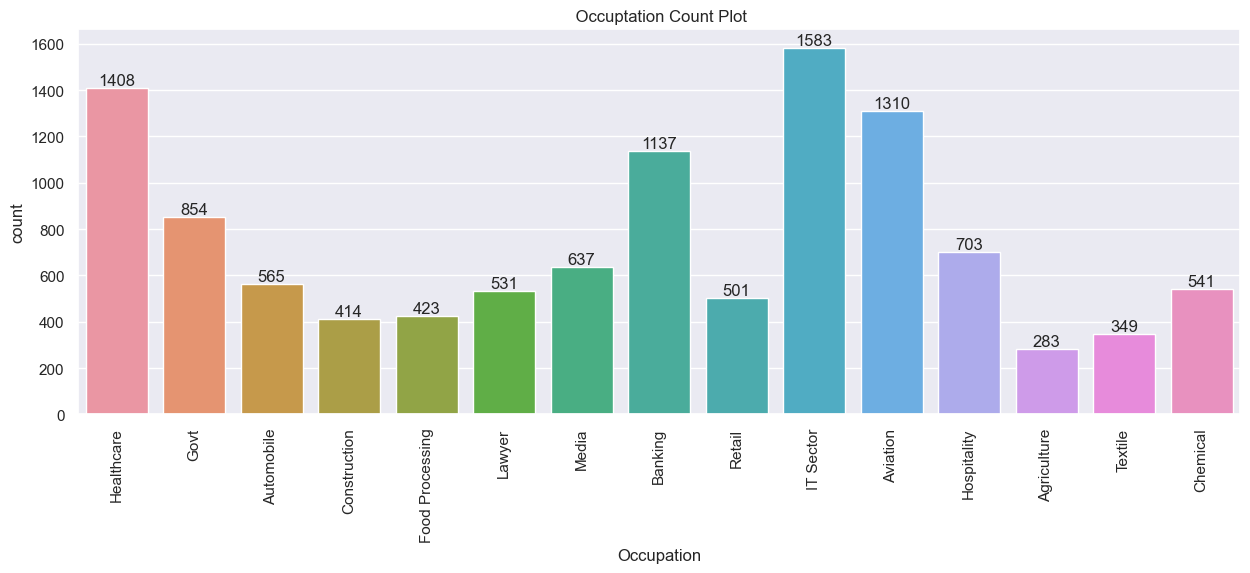

In [255]:
#Plot Occuptation Count Plot
fig, ax = plt.subplots(figsize=(15,5))
ax =  sns.countplot(data=df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(' Occuptation Count Plot')
plt.xticks(rotation='vertical')
plt.show();


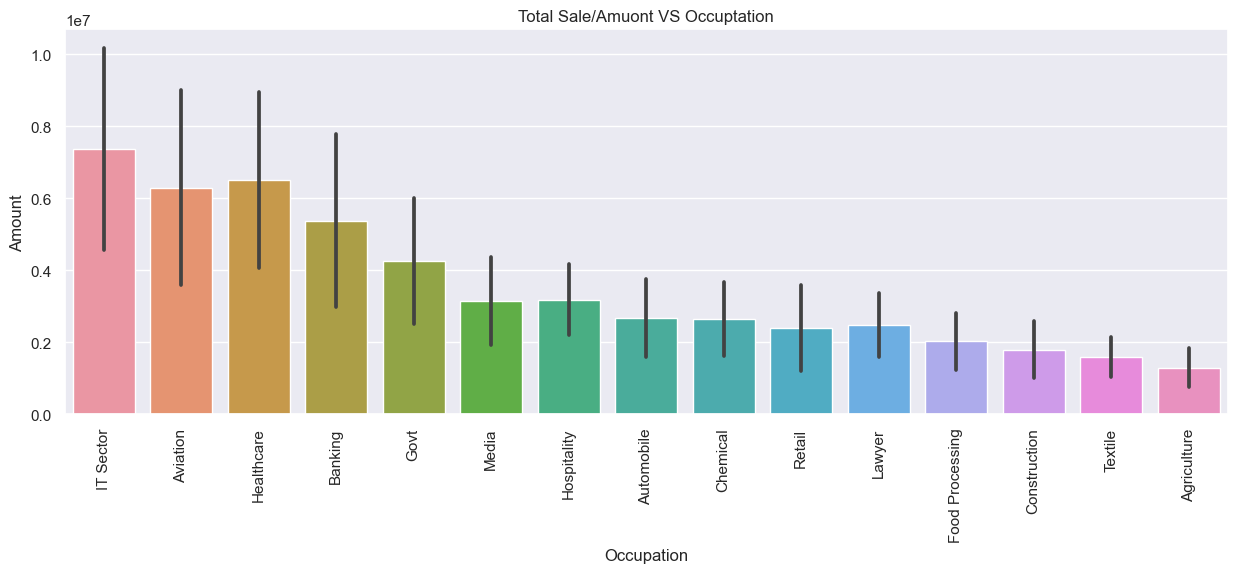

In [253]:
# Total Sale/Amuont VS Occuptation
fig, ax = plt.subplots(figsize=(15,5))
occupation_sale = df.groupby(['Occupation', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=occupation_sale, x='Occupation', y='Amount')
plt.title('Total Sale/Amuont VS Occuptation')
plt.xticks(rotation='vertical')
plt.show();

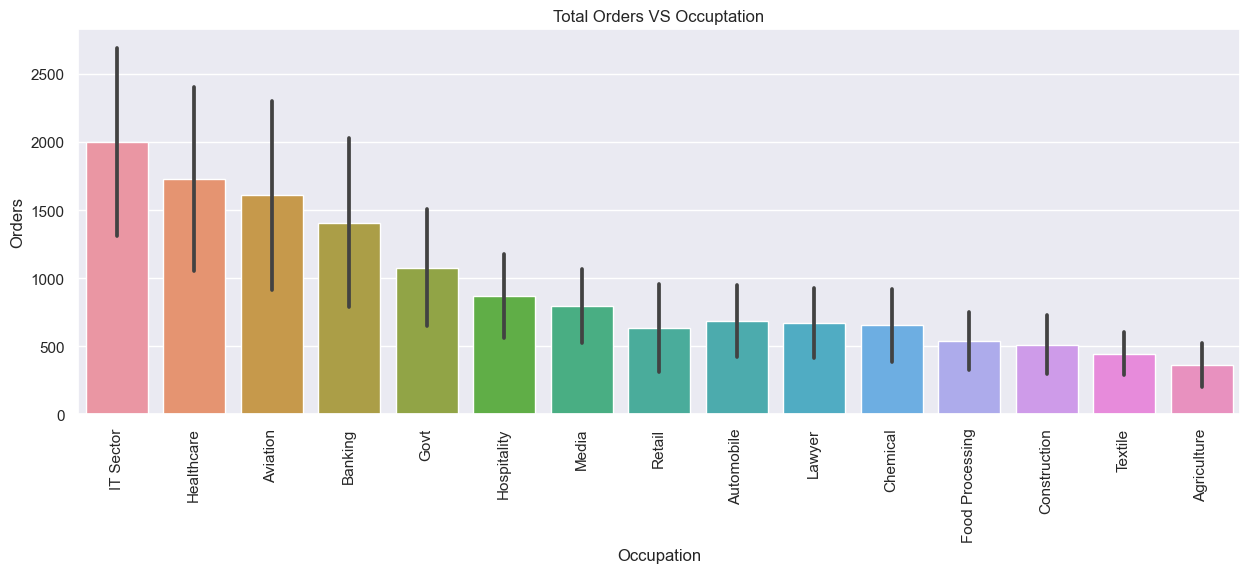

In [251]:
# Total Orders VS Occuptation
fig, ax = plt.subplots(figsize=(15,5))
occupation_sale = df.groupby(['Occupation', 'Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.barplot(data=occupation_sale, x='Occupation', y='Orders')
plt.xticks(rotation='vertical')
plt.title('Total Orders VS Occuptation')
plt.show();

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation Sector

## Product_Category

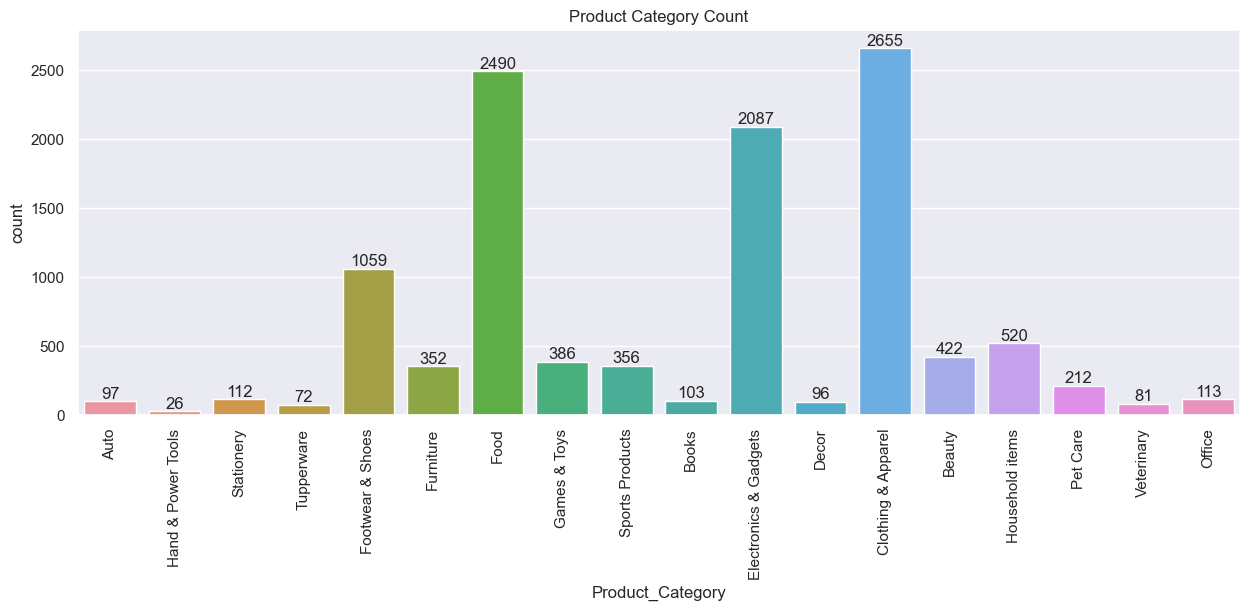

In [249]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=df, x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation = 'vertical')
plt.title('Product Category Count')
plt.show();

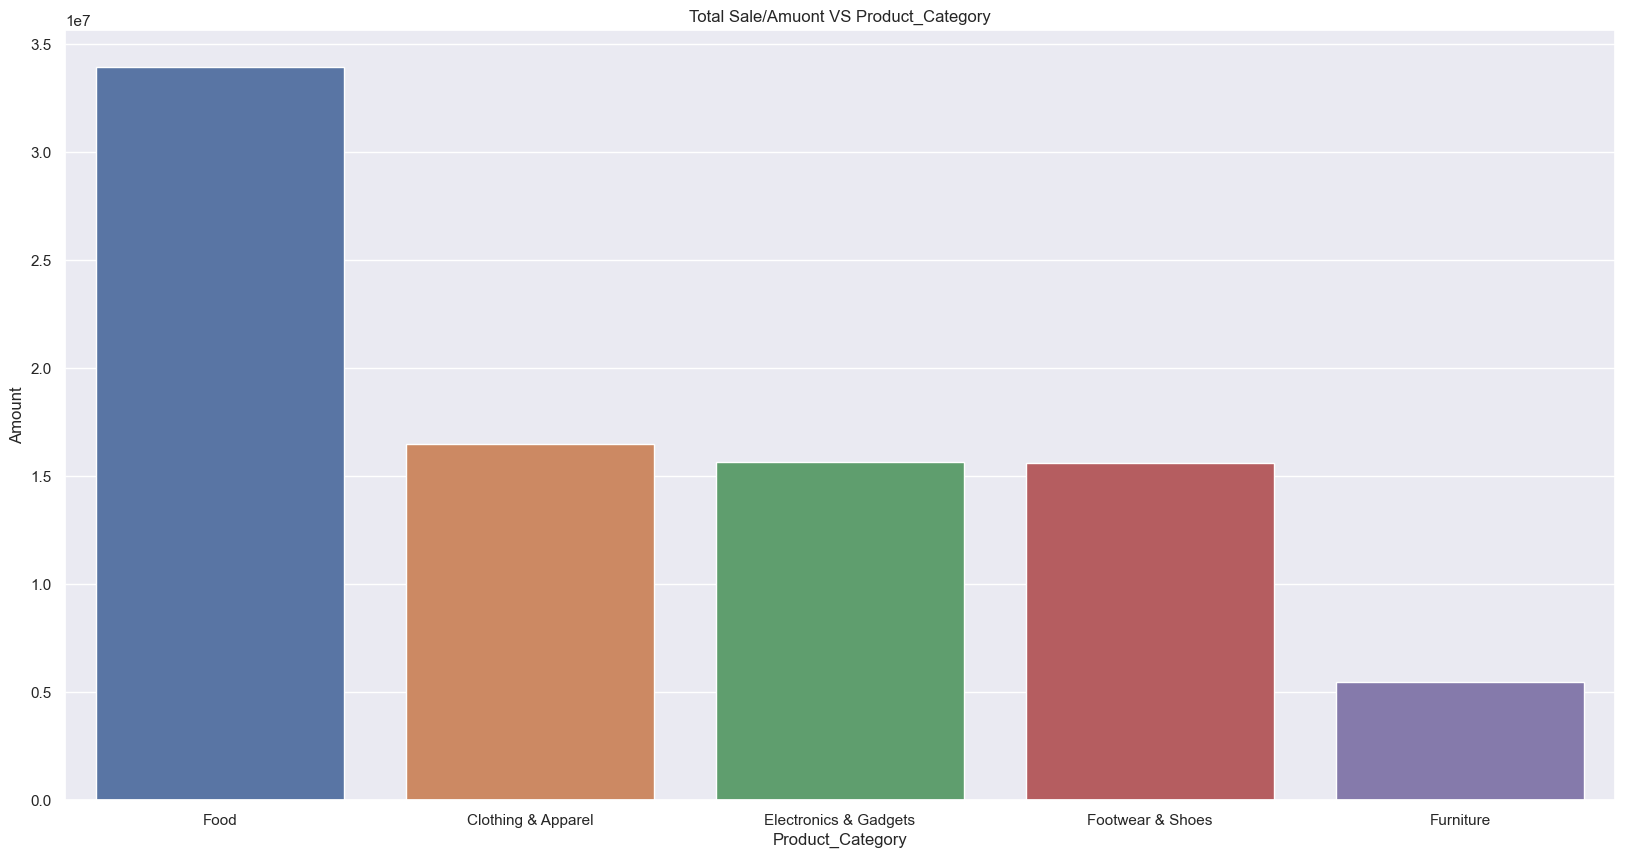

In [258]:
# Total Sale/Amuont VS Product_Category
fig, ax = plt.subplots(figsize=(20,10))
occupation_sale = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
sns.barplot(data=occupation_sale, x='Product_Category', y='Amount')
plt.title('Total Sale/Amuont VS Product_Category')
plt.show();

From above graph we can see that most sale/amount genrated product categoies are Food, Clothing and Electronics.

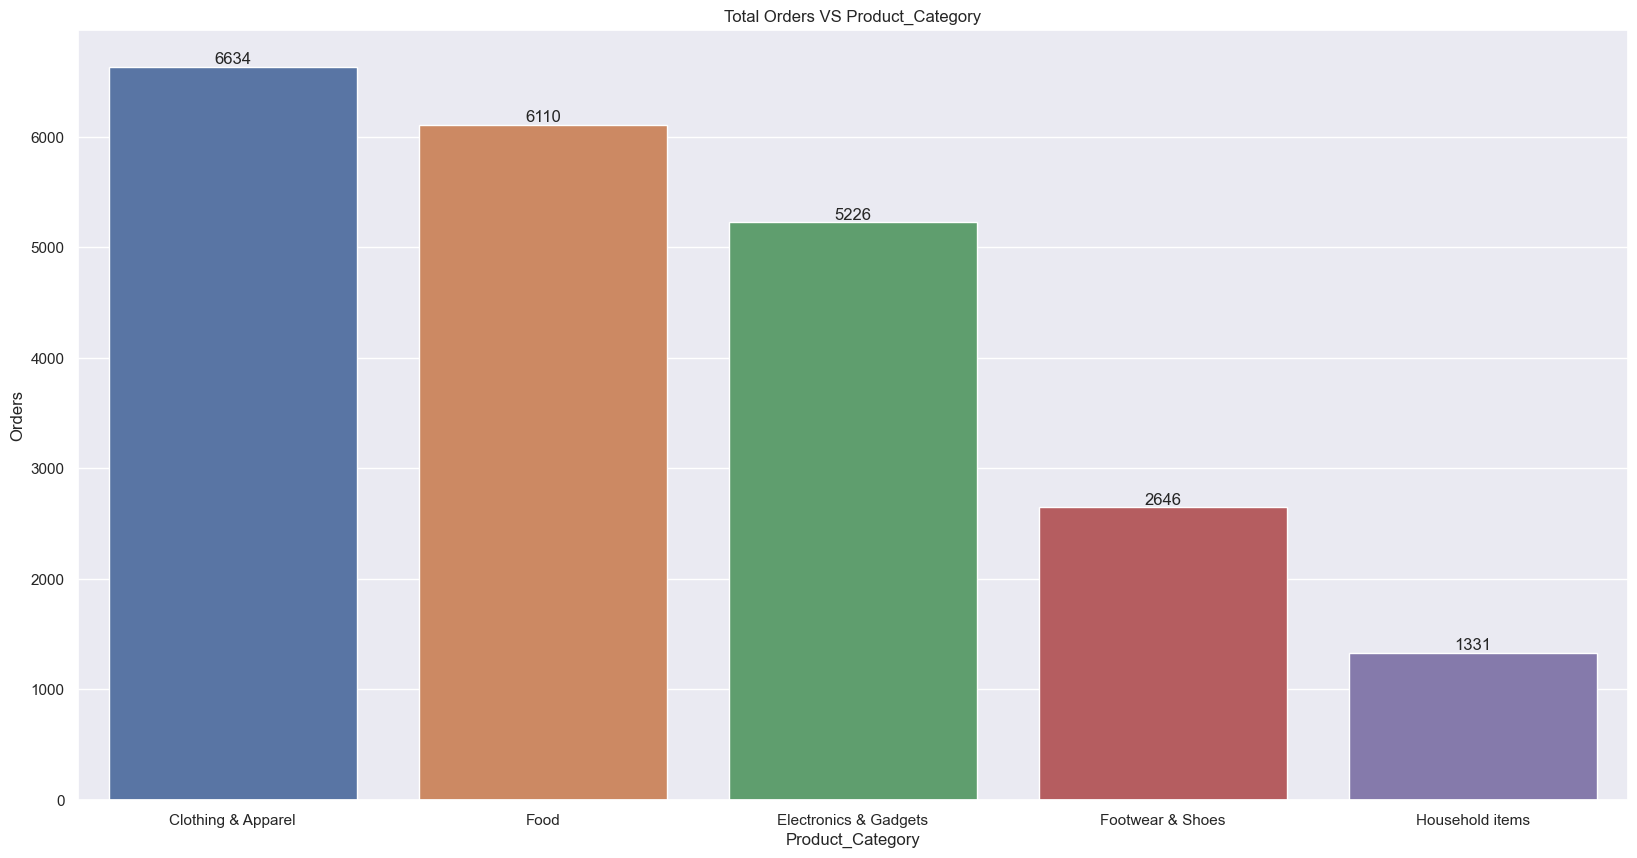

In [283]:
# Total Orders VS Product_Category
fig, ax = plt.subplots(figsize=(20,10))
occupation_sale = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
ax = sns.barplot(data=occupation_sale, x='Product_Category', y='Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Orders VS Product_Category')
plt.show();

From above graph we can see that most sold products are from Clothing, Food and Electronics Category.

## Product_ID

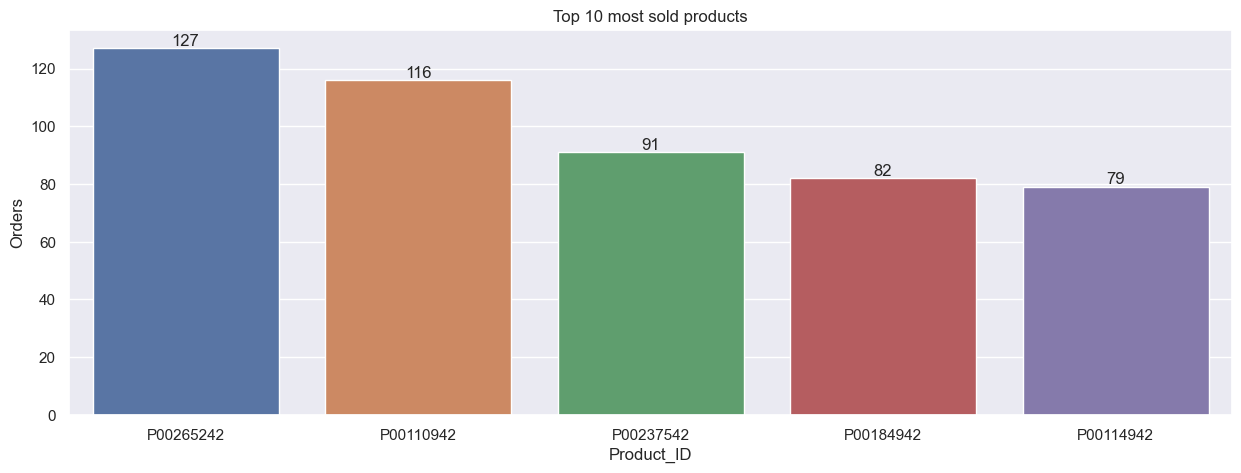

In [280]:
# Top 10 most sold products
fig, ax = plt.subplots(figsize=(15,5))
sold_products = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
ax = sns.barplot(data=sold_products, x='Product_ID', y='Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 most sold products')
plt.show();


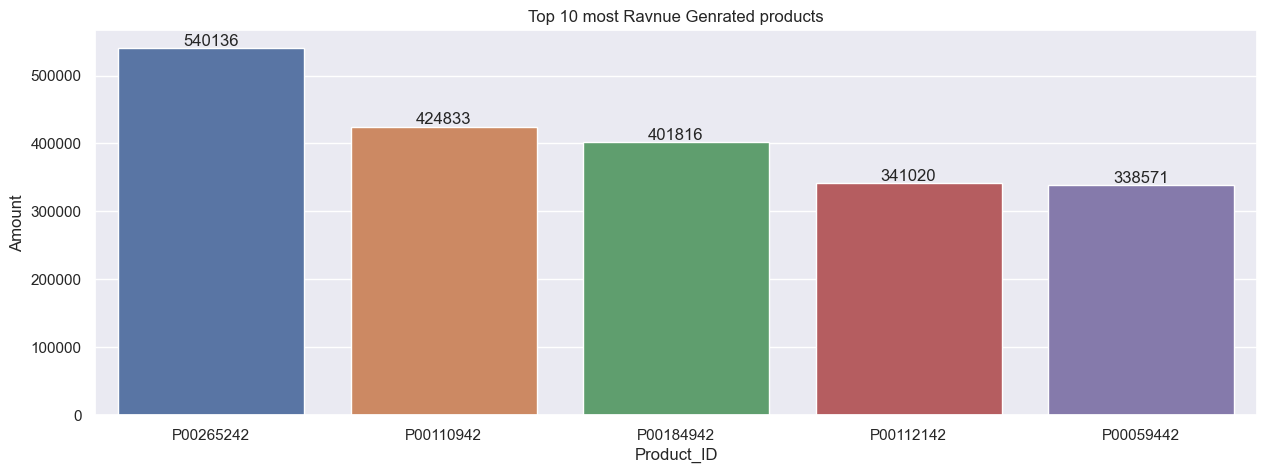

In [281]:
# Top 10 most Ravnue Genrated products
fig, ax = plt.subplots(figsize=(15,5))
sold_products = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
ax = sns.barplot(data=sold_products, x='Product_ID', y='Amount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 most Ravnue Genrated products')
plt.show();

## Customers

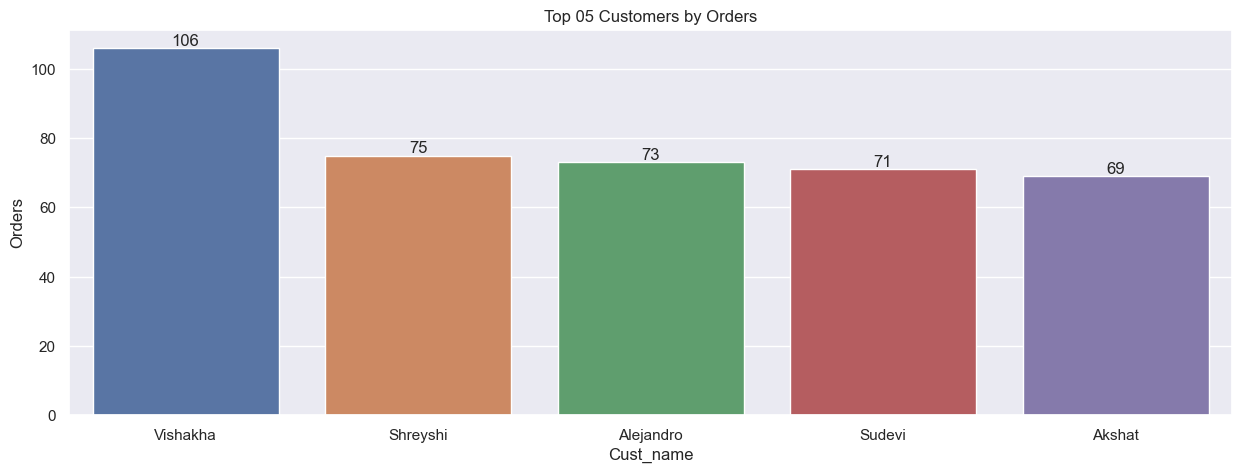

In [233]:
# Top 05 Customers by Orders
fig, ax = plt.subplots(figsize=(15,5))
cust_orders = df.groupby(['Cust_name'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
ax = sns.barplot(data=cust_orders, x='Cust_name', y='Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 05 Customers by Orders')
plt.show();

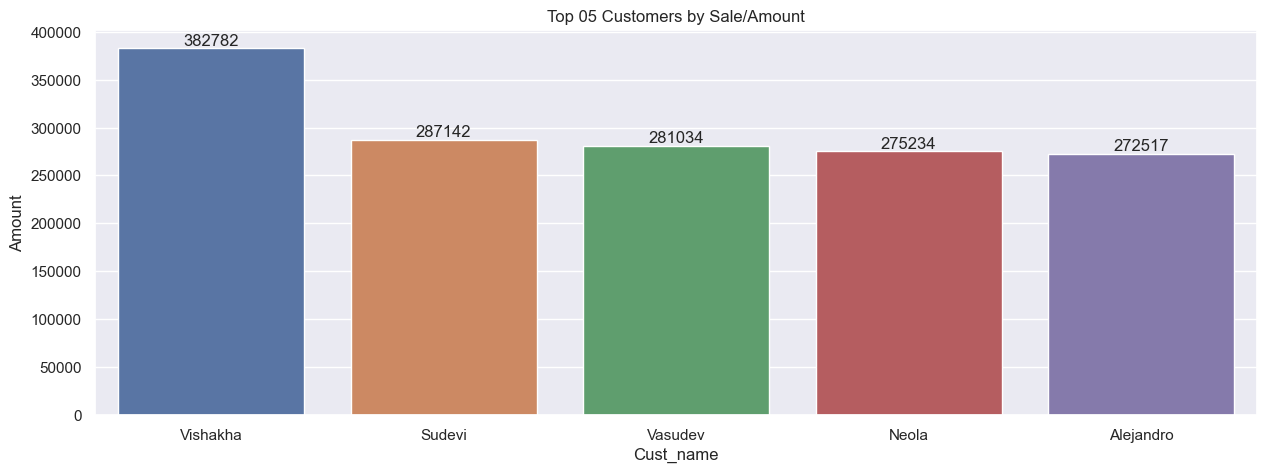

In [267]:
# Top 05 Customers by Sale/Amount
fig, ax = plt.subplots(figsize=(15,5))
cust_orders = df.groupby(['Cust_name'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
ax = sns.barplot(data=cust_orders, x='Cust_name', y='Amount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 05 Customers by Sale/Amount')
plt.show();

## Conclusion:
Married women age group 26-35 years from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.